In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ergo
from ergo.conditions import IntervalCondition, MaxEntropyCondition
from ergo.distributions.point_density import PointDensity
from ergo.scale import Scale, LogScale
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy.stats import logistic
from numpy import trapz

/Users/stuhlmueller/Projects/ergo/ergo/ppl.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
rv = logistic(loc=2.5, scale=0.1)

In [4]:
xs = np.linspace(1, 4, 100)

In [5]:
rv_ps = rv.pdf(xs)
rv_cs = rv.cdf(xs)

In [6]:
dist = PointDensity(xs, rv_ps, LogScale(0.01, 5, 10))
hd_ps = [float(dist.pdf(x)) for x in xs]
hd_cs = [float(dist.cdf(x)) for x in xs]

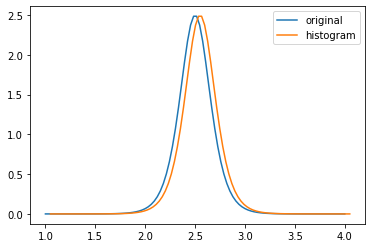

In [7]:
seaborn.lineplot(xs, rv_ps, label="original")
seaborn.lineplot(xs+0.05, hd_ps, label="histogram")

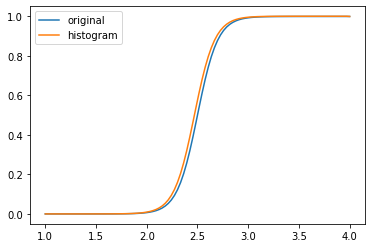

In [8]:
seaborn.lineplot(xs, rv_cs, label="original")
seaborn.lineplot(xs, hd_cs, label="histogram")

1.0011541

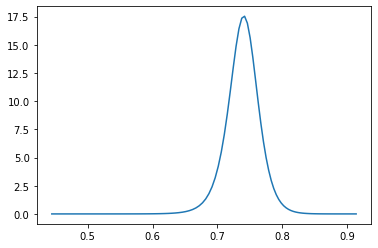

In [9]:
seaborn.lineplot(x=dist.normed_xs, y=dist.normed_densities)
trapz(y=dist.normed_densities, x=dist.normed_xs)

0.9999993835210006

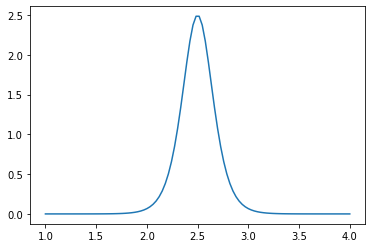

In [10]:
seaborn.lineplot(x=xs, y=rv_ps)
trapz(y=rv_ps, x=xs)

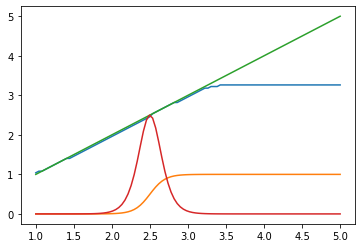

In [11]:
import pytest

scale = LogScale(0, 10, 2)

rv = logistic(loc=2.5, scale=0.1)
xs = np.linspace(1, 5, 100)
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)
dist = PointDensity(xs, orig_densities, scale)
dist_densities = np.array([float(dist.pdf(x)) for x in xs])
assert dist_densities == pytest.approx(orig_densities, abs=0.01)
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
# assert dist_cdfs == pytest.approx(orig_cdfs, abs=0.05)    
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs])
# assert dist_ppfs == pytest.approx(xs, abs=0.05)

seaborn.lineplot(x=xs, y=dist_ppfs)
seaborn.lineplot(x=xs, y=orig_cdfs)
seaborn.lineplot(x=xs, y=xs)
seaborn.lineplot(x=xs, y=orig_densities)

In [12]:
scale = LogScale(0.1, 5, 10)

rv = logistic(loc=2.5, scale=0.2)
xs = np.linspace(1, 5, 100)
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)
dist = PointDensity(xs, orig_densities, scale)
dist_densities = np.array([float(dist.pdf(x)) for x in xs])
# assert dist_densities == pytest.approx(orig_densities, abs=0.01)
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
# assert dist_cdfs == pytest.approx(orig_cdfs, abs=0.05)
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs[:50]])
# assert dist_ppfs == pytest.approx(xs, abs=0.1)
# for (x, dist_ppf) in zip(xs[:50], dist_ppfs):
#     print(abs(x - dist_ppf))

Tracing PointDensity condition loss for CrossEntropyCondition:
- Fixed: {'xs': Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>}
- Optim: Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>
- Cond: ((Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=-1/1)>,), ((Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>, Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>, Traced<ShapedArray(float32[10]):JaxprTrace(level=-1/1)>), (Traced<ShapedArray(float32[], weak_type=True):JaxprTrace(level=-1/1)>, Traced<ShapedArray(int32[], weak_type=True):JaxprTrace(level=-1/1)>)))


Tracing PointDensity condition loss for CrossEntropyCondition:
- Fixed: {'xs': Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>}
- Optim: Traced<ShapedArray(float32[10])>with<JVPTrace(level=1/2)>
  with primal = Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>
       tangent = Traced<ShapedArray(float32[10]):JaxprTrace(level=0/2)>
- Cond: ((Traced<ShapedArray(float32[], weak_type=Tr

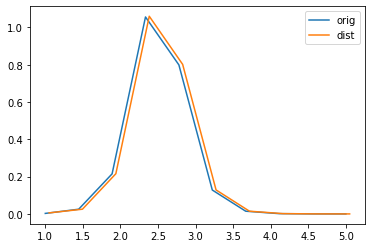

In [13]:
from ergo.conditions import IntervalCondition, MaxEntropyCondition, CrossEntropyCondition

# scale = LogScale(0.1, 5, 2)
scale = Scale(0.1, 5)

rv = logistic(loc=2.5, scale=0.2)
xs = np.linspace(1, 5, 10) ###
orig_densities = rv.pdf(xs)
orig_cdfs = rv.cdf(xs)

direct_dist = PointDensity(xs, orig_densities, scale)
condition = CrossEntropyCondition(p_dist=direct_dist)

# import jax
# with jax.disable_jit():
dist = PointDensity.from_conditions([condition], fixed_params={"xs": xs}, scale=scale)

dist_densities = np.array([float(dist.pdf(x)) for x in xs])
dist_cdfs = np.array([float(dist.cdf(x)) for x in xs])
dist_ppfs = np.array([float(dist.ppf(c)) for c in orig_cdfs[10:50]])

seaborn.lineplot(x=xs, y=orig_densities, label="orig")
seaborn.lineplot(x=xs+0.05, y=dist_densities, label="dist")